**Importar as bibliotecas do Python que serão utilizadas para resolver o problema**

In [56]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

**Método para ler a tabela 'Dados' do arquixo xlsx que foi disponibilizado**

In [57]:
df = pd.read_excel('aevo_-_desafio_estágio_em_sales_ops.xlsx', sheet_name='Dados')
print(df)

    Nome da empresa Resultado da negociação  Valor do contrato (R$)  \
0         Empresa 1        Contrato perdido                 2000.00   
1         Empresa 2        Contrato perdido                 2000.00   
2         Empresa 3        Contrato fechado                10898.93   
3         Empresa 4        Contrato perdido                 2168.93   
4         Empresa 5        Contrato perdido                 3237.79   
..              ...                     ...                     ...   
995     Empresa 996        Contrato perdido                 4829.56   
996     Empresa 997        Contrato fechado                12468.05   
997     Empresa 998        Contrato perdido                 3627.21   
998     Empresa 999        Contrato perdido                 5800.80   
999    Empresa 1000        Contrato perdido                 4210.54   

     Tempo de negociação (dias)       Setor  \
0                            60    Serviços   
1                            73  Financeiro   
2     

In [58]:
print(df.columns)
print(df['Resultado da negociação'].unique())

Index(['Nome da empresa', 'Resultado da negociação', 'Valor do contrato (R$)',
       'Tempo de negociação (dias)', 'Setor',
       'Tamanho da empresa (colaboradores)', 'Localidade da sede'],
      dtype='object')
['Contrato perdido' 'Contrato fechado']


**Checagem de integridade do Dataset, ou seja, checar se, por exemplo, "há valores nulos" na base de dados disponibilizada**

In [59]:
if df.isnull().values.any():
    print("A base de dados contém valores nulos.")
else: 
    print("A base de dados não contém valores nulos.")

A base de dados não contém valores nulos.


**Adicionar uma feature de 'região' na base de dados, a fim de enriquecer nossa análise**

In [60]:
def definir_regiao(estado):
    regioes = {
        'nordeste': ['BA', 'PE', 'CE', 'MA', 'PI', 'RN', 'PB', 'SE', 'AL'],
        'centro-oeste': ['MT', 'MS', 'GO', 'DF'],
        'sul': ['RS', 'SC', 'PR'],
        'sudeste': ['SP', 'RJ', 'MG', 'ES'],
        'norte': ['AM', 'RR', 'AP', 'PA', 'RO', 'AC']
    }

    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return 'outra'

df['região'] = df['Localidade da sede'].apply(definir_regiao)

In [61]:
print(df['região'])

0      centro-oeste
1      centro-oeste
2             norte
3               sul
4      centro-oeste
           ...     
995    centro-oeste
996    centro-oeste
997         sudeste
998             sul
999         sudeste
Name: região, Length: 1000, dtype: object


**Mapeamento para cálculo de matriz de correlação**

In [62]:
#mapeamento_contrato = {"Contrato perdido": 0, "Contrato fechado": 1}
#mapeamento_setor = {'Serviços': 0, 'Financeiro': 1, 'Indústrias': 2, 'Saúde': 3, 'Tecnologia': 4, 'Logística': 5}
#mapeamento_regiao = {'nordeste': 0, 'centro-oeste': 1, 'sul': 2, 'sudeste': 3, 'norte': 4}

df_correlacionado = df.copy()

#df_correlacionado['Resultado da negociação'] = df_correlacionado['Resultado da negociação'].map(mapeamento_contrato)
#df_correlacionado['Setor'] = df_correlacionado['Setor'].map(mapeamento_setor)
#df_correlacionado['região'] = df_correlacionado['região'].map(mapeamento_regiao)

df_correlacionado = df_correlacionado.drop(columns=["Nome da empresa", "Localidade da sede", "Resultado da negociação", "Setor", "região"])
print(df_correlacionado)



     Valor do contrato (R$)  Tempo de negociação (dias)  \
0                   2000.00                          60   
1                   2000.00                          73   
2                  10898.93                          43   
3                   2168.93                          95   
4                   3237.79                          89   
..                      ...                         ...   
995                 4829.56                          60   
996                12468.05                          41   
997                 3627.21                          85   
998                 5800.80                         100   
999                 4210.54                          80   

     Tamanho da empresa (colaboradores)  
0                                  8357  
1                                  1176  
2                                 40489  
3                                  4551  
4                                  6719  
..                                  ...

**Matriz de correlação das features do banco de dados**

<AxesSubplot: >

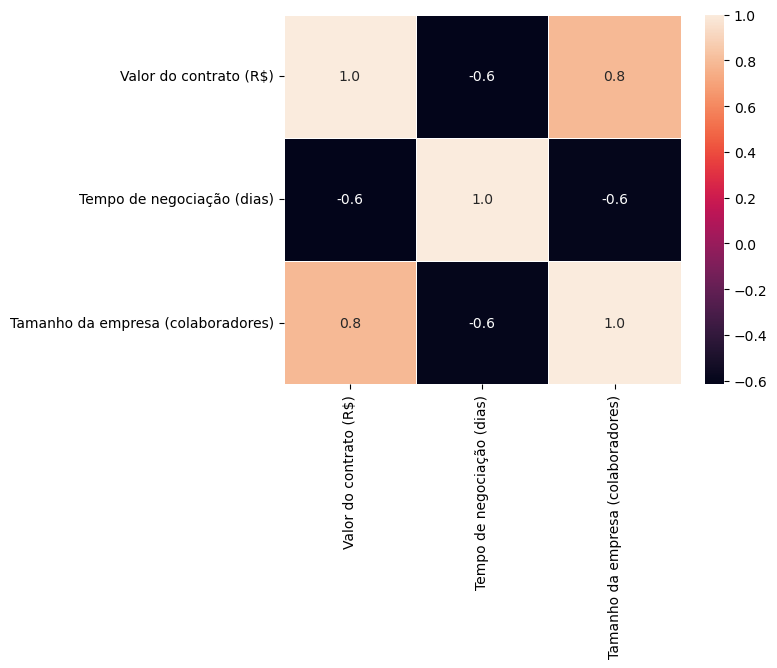

In [63]:

mat_corr = df_correlacionado.corr()
plot = sn.heatmap(mat_corr, annot = True, fmt=".1f", linewidths=.6)
plot


*Com a matriz de correlação, podemos concluir que: Quanto maior o tamanho da empresa(em número de colaboradores), maior o valor do contrato que está sendo **negociado**.*

*Método para ver quantos contratos foram fechados em cada região do Brasil*

In [64]:
contratos_fechados = df[df["Resultado da negociação"] == "Contrato fechado"]
contratos_por_regiao = contratos_fechados.groupby("região").size().reset_index(name="Quantidade de Contratos Fechados")

print(contratos_por_regiao)

         região  Quantidade de Contratos Fechados
0  centro-oeste                                29
1      nordeste                                22
2         norte                                17
3       sudeste                                32
4           sul                                23


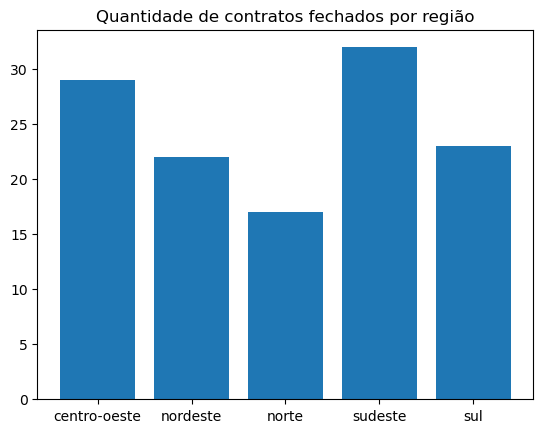

In [66]:
plt.bar(contratos_por_regiao['região'], height = contratos_por_regiao['Quantidade de Contratos Fechados'])
plt.title('Quantidade de contratos fechados por região')
plt.show()

*Podemos perceber que as regiãos que tiveram mais contratos fechados foram as regiões **sudeste** e **centro-oeste**. Agora, vamos analisar os contratos fechados dessas duas regiões para detectarmos **tendências**.*